In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

sns.set(rc = {'figure.figsize':(12,10)})

# import warnings
# warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Types of Features:
1. Categorical- Sex and Embarked
2. Continuous- Age, Fare
3. Discrete- Parch, SibSp
4. Alphanumeric- Cabin

In [45]:
# SibSp -- Number of Siblings/Spouses Aboard
# Parch -- Number of Parents/Children Aboard
# Pclass -- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# Embarked -- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# Cabin -- Cabin Number
# Ticket -- Ticket Number
# Fare -- Passenger Fare
# Name -- Name
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


NUMERICAL VALUE ANALYSIS

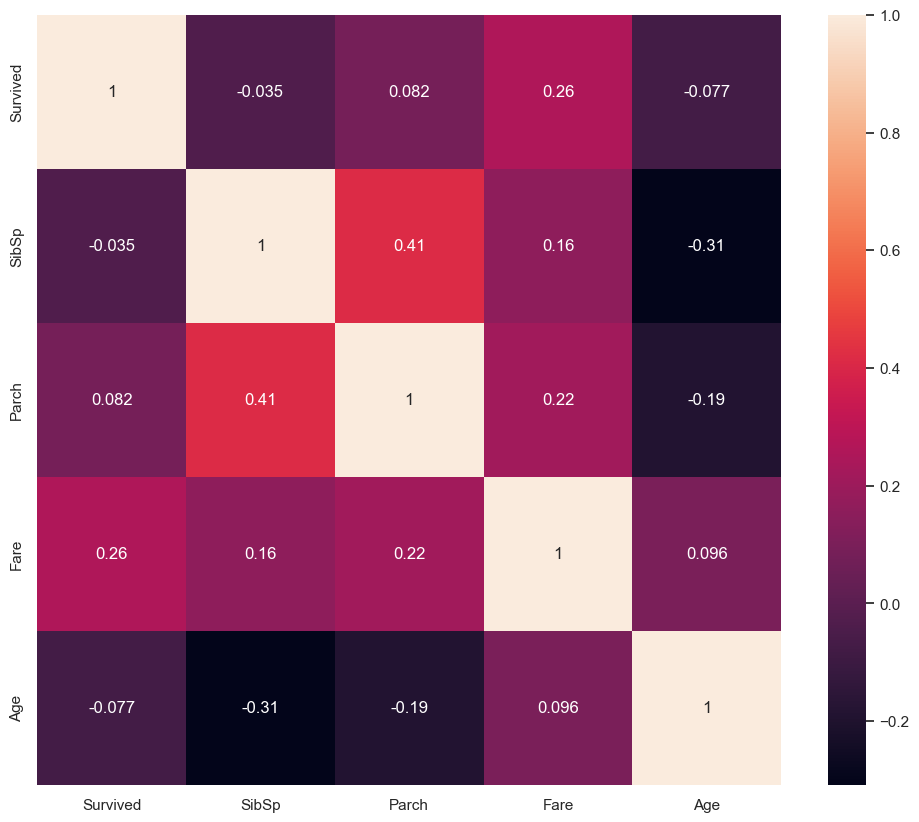

In [46]:
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(df[['Survived','SibSp','Parch','Fare','Age']].corr(), annot=True)

In [47]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

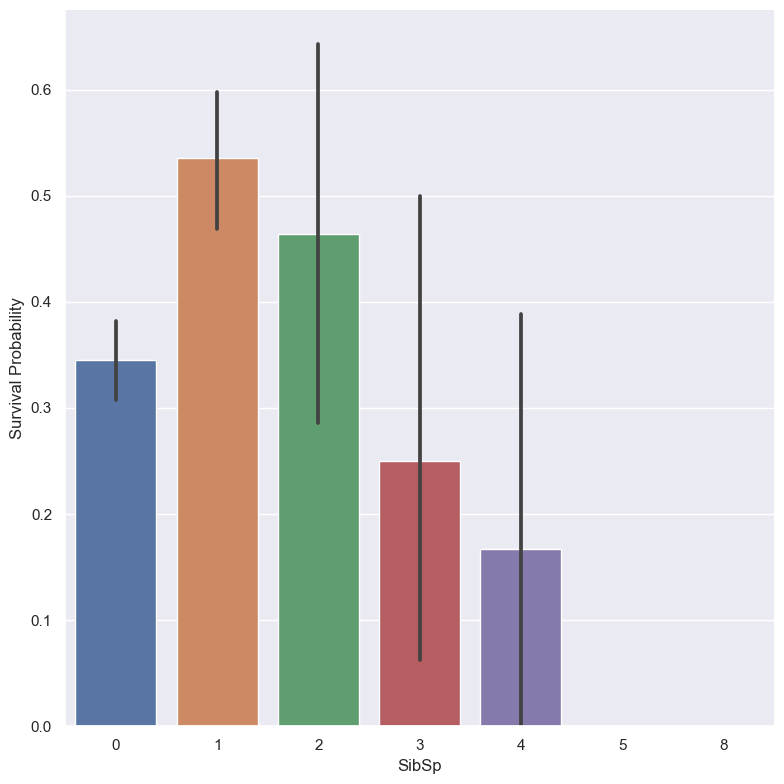

In [48]:
sns.catplot(x='SibSp',y='Survived',data=df,kind='bar',height=8).set_ylabels('Survival Probability')

C:\Users\ANURAG\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\ANURAG\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ANURAG\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\ANURAG

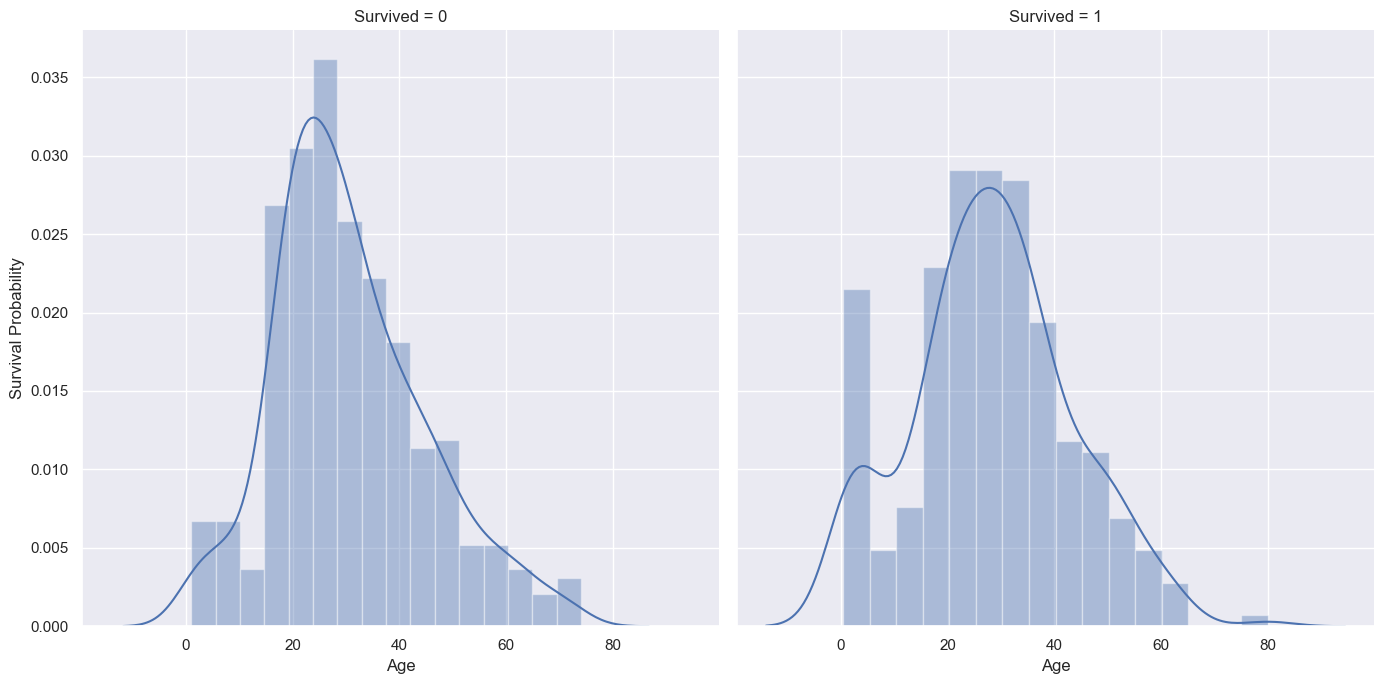

In [49]:
age_visual = sns.FacetGrid(df, col='Survived',height=7)
age_visual = age_visual.map(sns.distplot, "Age").set_axis_labels("Age", "Survival Probability")

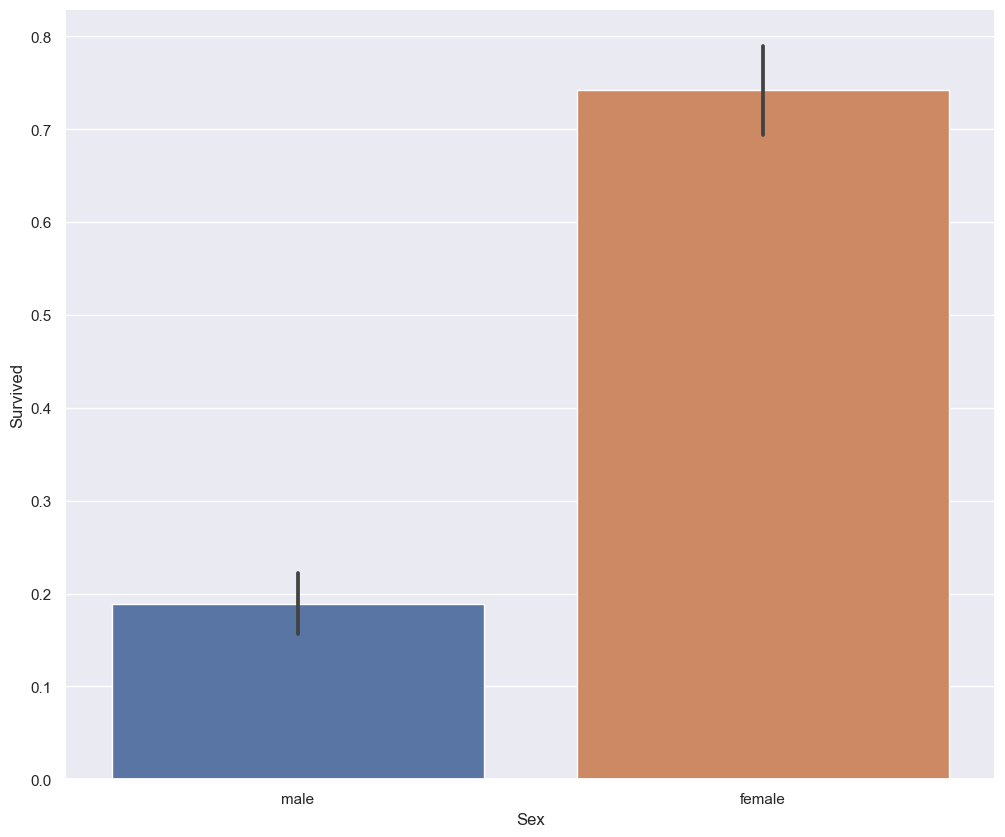

In [50]:
sex_plot = sns.barplot(x='Sex', y='Survived', data=df)

In [51]:
df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


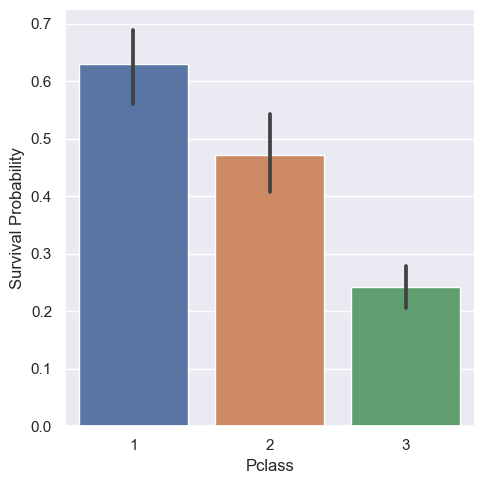

In [52]:
p_class = sns.catplot(x="Pclass", y="Survived", kind="bar", data=df)
p_class.set_ylabels("Survival Probability")

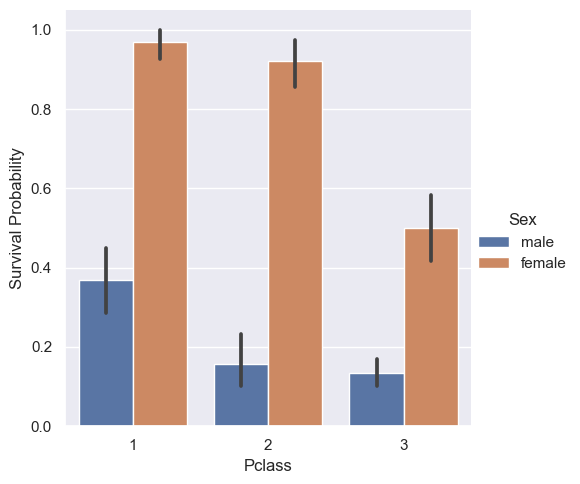

In [53]:
p_class = sns.catplot(x="Pclass", y="Survived",hue="Sex", kind="bar", data=df)
p_class.set_ylabels("Survival Probability")

In [54]:
df['Embarked'].isnull().sum()

2

In [55]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
df['Embarked'] = df['Embarked'].fillna('S')

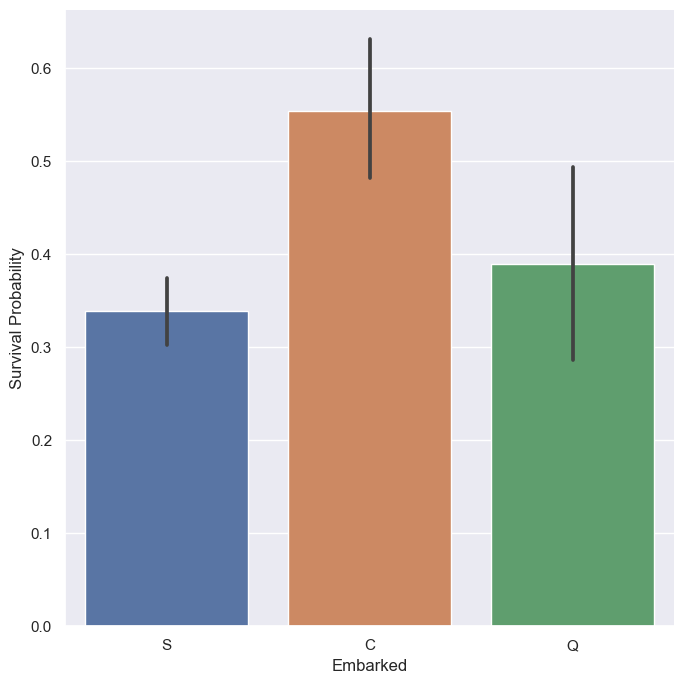

In [57]:
g = sns.catplot(x='Embarked',y='Survived',data = df,kind='bar',height=7)
g.set_ylabels('Survival Probability')

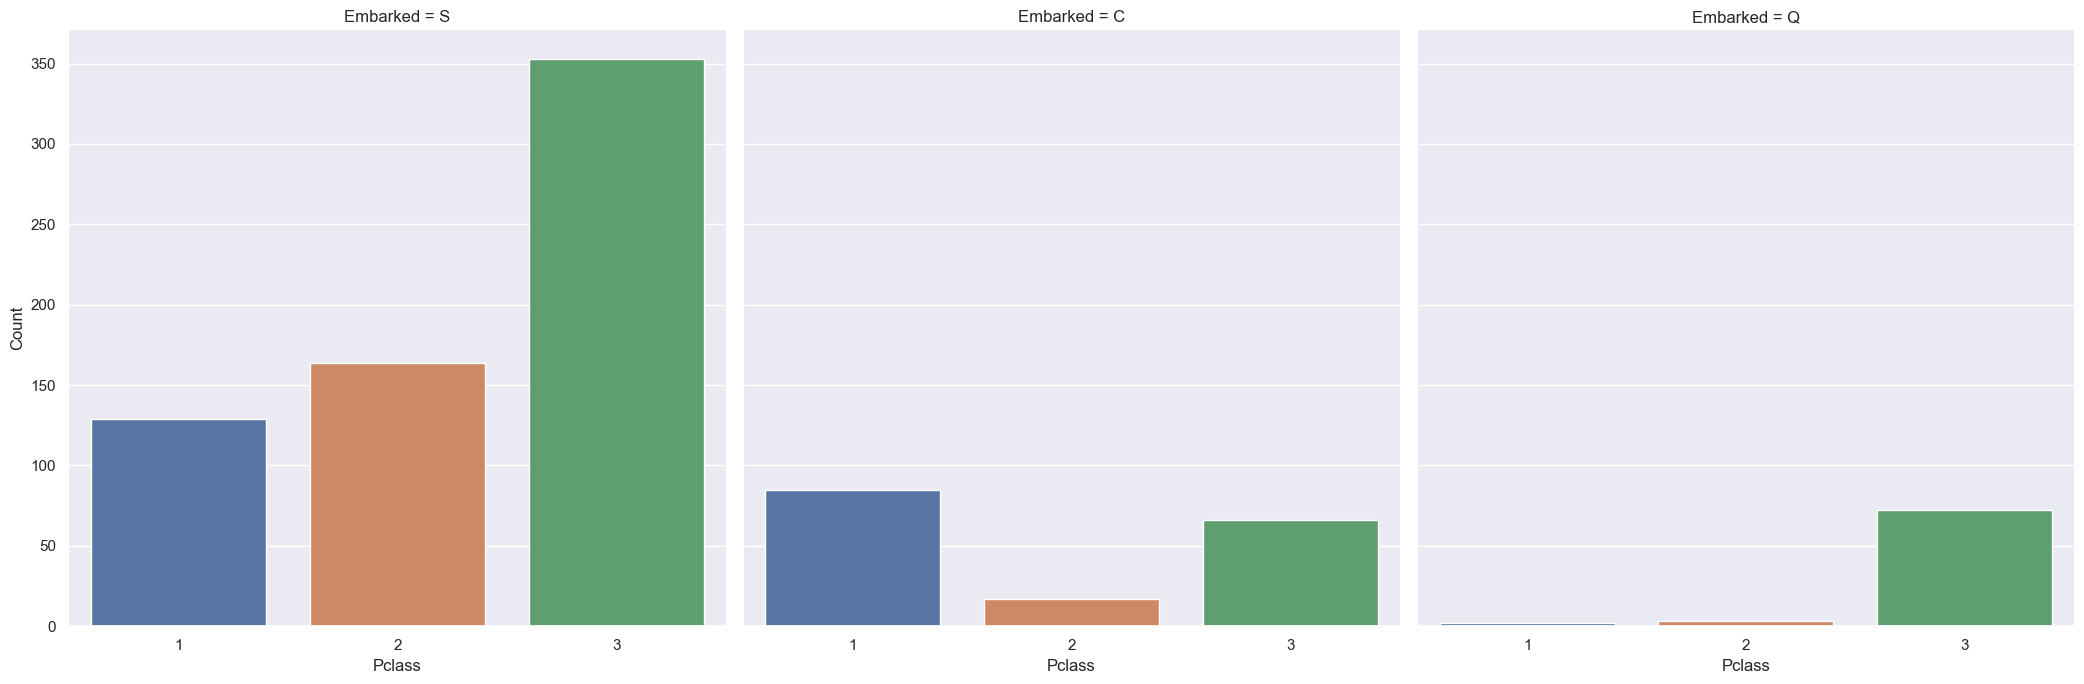

In [58]:
g = sns.catplot(x='Pclass',col='Embarked',data=df,kind='count',height=7)
g.despine(left=True)
g = g.set_ylabels('Count')

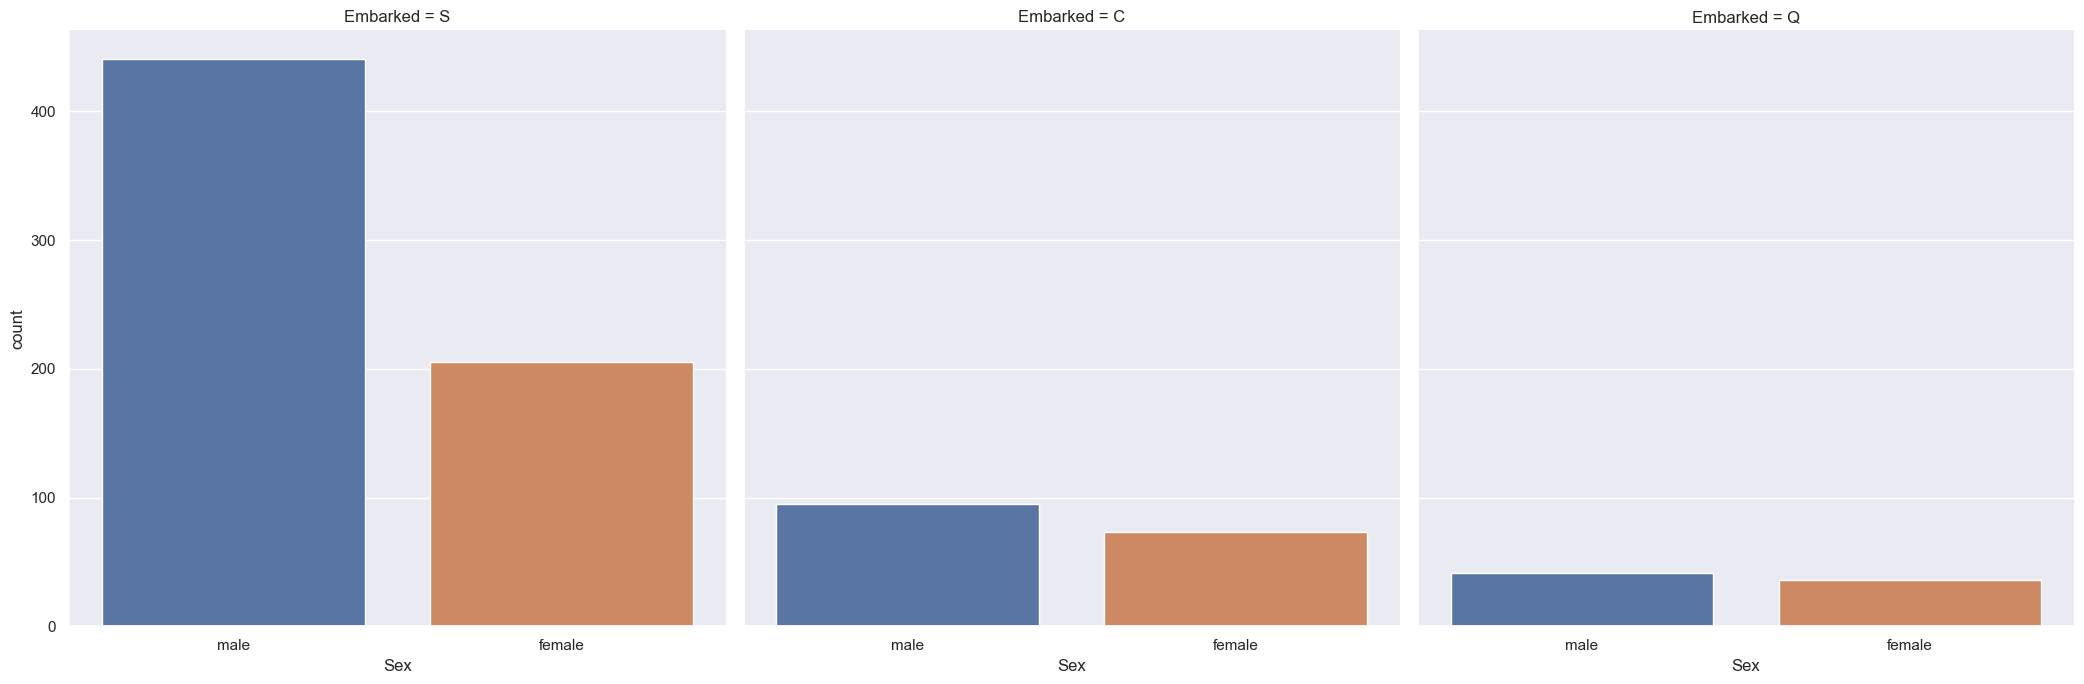

In [59]:
g = sns.catplot(x='Sex',col='Embarked',data=df,height=7,kind='count')

In [60]:
data = pd.read_csv('titanic_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
mean = data['Age'].mean()
std = data['Age'].std()
is_null = data['Age'].isnull().sum()

rand_age = np.random.randint(mean - std, mean + std, size = is_null)
rand_age

array([22, 23, 27, 16, 40, 28, 24, 30, 29, 25, 33, 20, 43, 23, 19, 24, 25,
       34, 20, 19, 15, 26, 21, 38, 40, 18, 19, 22, 29, 29, 24, 31, 43, 27,
       37, 37, 18, 33, 20, 24, 39, 38, 29, 43, 38, 39, 31, 43, 35, 30, 19,
       42, 36, 18, 26, 35, 37, 31, 18, 43, 16, 39, 31, 16, 43, 25, 22, 37,
       26, 39, 17, 20, 24, 16, 36, 28, 15, 22, 30, 20, 19, 20, 17, 26, 18,
       25, 37, 21, 38, 25, 29, 29, 19, 41, 41, 22, 21, 38, 36, 43, 31, 28,
       23, 20, 16, 40, 37, 43, 32, 37, 33, 37, 36, 23, 25, 34, 24, 37, 15,
       15, 38, 41, 15, 19, 20, 27, 32, 16, 38, 20, 37, 23, 28, 30, 33, 32,
       24, 19, 23, 43, 41, 35, 20, 26, 43, 22, 30, 28, 23, 24, 16, 27, 40,
       21, 31, 39, 29, 22, 37, 26, 15, 24, 40, 23, 35, 20, 26, 43, 32, 32,
       30, 28, 15, 26, 33, 20, 42])

In [62]:
a = data['Age'].copy()
a[np.isnan(a)] = rand_age
data['Age'] = a

In [63]:
data['Age'].isnull().sum()

0

In [64]:
data['Embarked'] = data['Embarked'].fillna('S')

In [65]:
col_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(col_to_drop, axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [66]:
genders = {'male':0, 'female':1}
ports = {'S':0, 'C':1, 'Q':2}
data['Sex'] = data['Sex'].map(genders)
data['Embarked'] = data['Embarked'].map(ports)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [68]:
x = data.drop(data.columns[[0]],axis=1)
y = data['Survived']
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [69]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [70]:
logreg = LogisticRegression()
svc_classifier = SVC()
knn_classifier = KNeighborsClassifier(5)
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [71]:
logreg.fit(X_train, Y_train)
svc_classifier.fit(X_train, Y_train)
knn_classifier.fit(X_train, Y_train)
dt_classifier.fit(X_train, Y_train)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000)

In [72]:
logreg_ypred = logreg.predict(X_test)
svc_classifier_ypred = svc_classifier.predict(X_test)
knn_classifier_ypred = knn_classifier.predict(X_test)
dt_classifier_ypred = dt_classifier.predict(X_test)
rf_classifier_ypred = rf_classifier.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(Y_test, logreg_ypred)
svc_classifier_acc = accuracy_score(Y_test, svc_classifier_ypred)
knn_classifier_acc = accuracy_score(Y_test, knn_classifier_ypred)
dt_classifier_acc = accuracy_score(Y_test, dt_classifier_ypred)
rf_classifier_acc = accuracy_score(Y_test, rf_classifier_ypred)

print("Logistic Regression Accuracy: ", round(logreg_acc*100,2))
print("SVC Classifier Accuracy: ", round(svc_classifier_acc*100,2))
print("KNN Classifier Accuracy: ", round(knn_classifier_acc*100,2))
print("Decision Tree Classifier Accuracy: ", round(dt_classifier_acc*100,2))
print("Random Forest Classifier Accuracy: ", round(rf_classifier_acc*100,2))

Logistic Regression Accuracy:  79.85
SVC Classifier Accuracy:  81.72
KNN Classifier Accuracy:  80.22
Decision Tree Classifier Accuracy:  77.99
Random Forest Classifier Accuracy:  82.46
